In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense) 

50000/50000 [==============================] - 8s 163us/step - loss: 0.4120 - acc: 0.8527 - val_loss: 2.1383 - val_acc: 0.5242
Epoch 49/50
50000/50000 [==============================] - 9s 179us/step - loss: 0.3906 - acc: 0.8604 - val_loss: 2.3320 - val_acc: 0.5099
Epoch 50/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.3787 - acc: 0.8635 - val_loss: 2.2873 - val_acc: 0.5177
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1

50000/50000 [==============================] - 12s 249us/step - loss: 0.8937 - acc: 0.6875 - val_loss: 1.4223 - val_acc: 0.5256
Epoch 50/50
50000/50000 [==============================] - 14s 282us/step - loss: 0.8775 - acc: 0.6908 - val_loss: 1.4138 - val_acc: 0.5269
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)   

50000/50000 [==============================] - 9s 182us/step - loss: 1.5528 - acc: 0.4578 - val_loss: 1.5706 - val_acc: 0.4529
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________

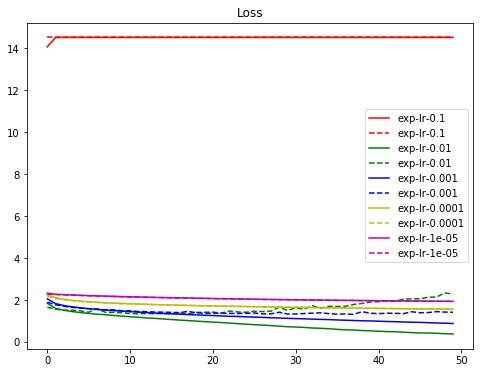

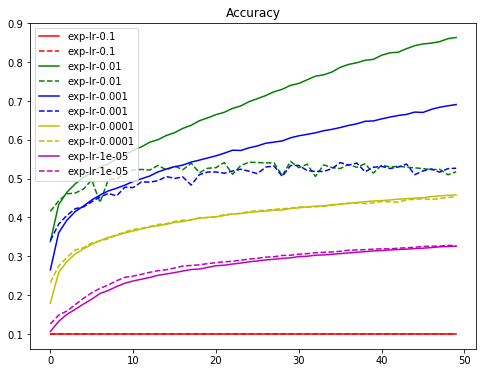

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.65

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.9537 - acc: 0.3020 - val_loss: 1.8099 - val_acc: 0.3586
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7605 - acc: 0.3752 - val_loss: 1.7588 - val_acc: 0.3731
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6876 - acc: 0.4012 - val_loss: 1.6904 - val_acc: 0.3943
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6273 - acc: 0.4248 - val_loss: 1.6363 - val_acc: 0.4192
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5874 - acc: 0.4393 - val_loss: 1.5847 - val_acc: 0.4360
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5511 - acc: 0.4513 - val_loss: 1.5901 - val_acc: 0.4247
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5179 - acc: 0.4639 - val_loss: 1.5192 - 

Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0757 - acc: 0.2744 - val_loss: 2.0276 - val_acc: 0.2910
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9909 - acc: 0.2976 - val_loss: 1.9612 - val_acc: 0.3116
Epoch 4/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.9348 - acc: 0.3171 - val_loss: 1.9152 - val_acc: 0.3211
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8954 - acc: 0.3308 - val_loss: 1.8871 - val_acc: 0.3252
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8656 - acc: 0.3438 - val_loss: 1.8566 - val_acc: 0.3461
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8407 - acc: 0.3545 - val_loss: 1.8343 - val_acc: 0.3526
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8195 - acc: 0.3632 - val_loss: 1.8136 - val_acc: 0.3642
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 166us/step - loss: 2.2446 - acc: 0.1928 - val_loss: 2.2343 - val_acc: 0.2010
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.2246 - acc: 0.2079 - val_loss: 2.2155 - val_acc: 0.2170
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.2067 - acc: 0.2226 - val_loss: 2.1983 - val_acc: 0.2288
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.1900 - acc: 0.2338 - val_loss: 2.1821 - val_acc: 0.2381
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.1743 - acc: 0.2432 - val_loss: 2.1669 - val_acc: 0.2490
Epoch 8/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.1595 - acc: 0.2512 - val_loss: 2.1527 - val_acc: 0.2547
Epoch 9/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.1457 - acc: 0.2591 - val_loss: 2.1393 - val_acc: 0.2599
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 158us/step - loss: 2.2994 - acc: 0.1085 - val_loss: 2.2969 - val_acc: 0.1108
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.2948 - acc: 0.1134 - val_loss: 2.2925 - val_acc: 0.1139
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.2905 - acc: 0.1176 - val_loss: 2.2884 - val_acc: 0.1192
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.2864 - acc: 0.1209 - val_loss: 2.2845 - val_acc: 0.1248
Epoch 8/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.2825 - acc: 0.1243 - val_loss: 2.2808 - val_acc: 0.1270
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.2788 - acc: 0.1271 - val_loss: 2.2773 - val_acc: 0.1312
Epoch 10/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.2753 - acc: 0.1297 - val_loss: 2.2739 - val_acc: 0.1322
Epoch 11/50
50000/50000 [===================

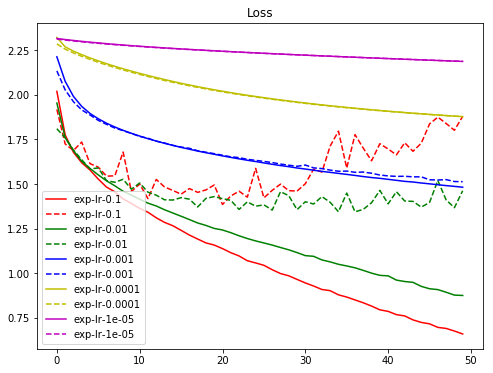

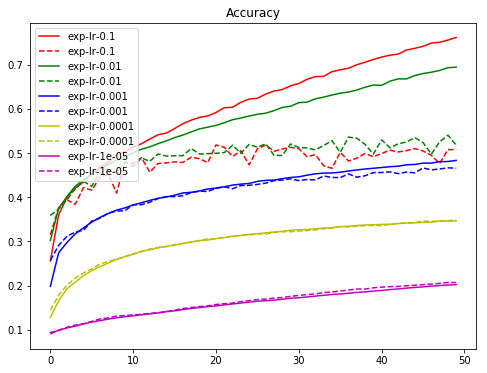

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()